## <strong> Filename: </strong> <em>covid_19_total_deaths_animated.ipynb<em>
##### <strong>Description:</strong> <em>Creates an Scatter plot of all deaths caused by COVID-19 in the world using dataset provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases</em>
##### <strong>Author:</strong> <em> Carlos Eduardo Beluzo (cbeluzo@gmail.com)</em>
##### <strong>Creation:</strong> <em> Mar/2020 </em>
##### <strong>Version:</strong> <em> 2020.03-1 </em>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly as plt
import plotly.express as px
import datetime as dt

# https://data.worldbank.org
dfPop = pd.read_csv('data/world-population-2018.csv', sep=';')
#TODO POP2019

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df['Province/State'] = df['Province/State'].fillna('n/a')
df = df.fillna(0)

dfA = df.drop(['Province/State','Lat','Long'], axis = 1)
dfA = dfA.groupby('Country/Region').sum().T
dfA = dfA.reset_index()
dfA = dfA.rename(columns = {'index':'Day'})
dfA[['Day']] = pd.to_datetime(dfA['Day'])

#dfA.head()

# Calculate rate
dfFinal = dfA.copy()

for country in dfA.columns[1:]:
    dfCountry = pd.DataFrame(dfA[[country]])
    dfAux = pd.DataFrame(dfCountry[country][1:])
    dfAux = dfAux.reset_index()
    dfAux = dfAux.drop(['index'], axis=1)
    dfAux = dfAux.append({country : 0} , ignore_index=True)
    dfCountry['next'] = dfAux
    dfAux['ori'] = dfCountry[country]
    dfCountry['rate'] = np.array((100 * dfAux[country].values / dfAux['ori'].values) - 100)
    dfCountry.loc[dfCountry['rate'] == -100] = 0
    dfCountry.loc[dfCountry['rate'] == np.inf] = 0
    dfCountry = dfCountry.fillna(0)
    rate = str('rate'+'_'+country)
    dfFinal[rate] = dfCountry['rate']

#dfFinal[['Brazil','rate_Brazil']].tail()

# Calculate Population Infection Rate per 100k individuas
df1 = pd.DataFrame({'Day':'','country':'','cases':int(),'rate':float(),'pop':int()}, index=[1])
df1 = df1.drop(df1.index)

for country in dfA.columns[1:]:
    rate = str('rate' + '_' + country)
    
    try:
        pop = dfPop[dfPop['country'] == country]['pop'].values[0]
    except:
        pop = 0
    
    dfAux = pd.DataFrame(dfFinal[['Day',country,country,rate,rate]])
    dfAux.columns = ['Day','country','cases','rate','pop']
    dfAux['country'] = country
    dfAux['pop'] = pop
    df1 = df1.append(dfAux)

df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
df1[['Day']] = df1['Day'].dt.strftime('%y%m%d')

# Contagion rate per 100k habitants
df1['infection_rate'] = 100000 * df1['cases']/df1['pop']

#df1.loc[df1.country == 'Brazil'].tail()


/home/cbeluzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

divide by zero encountered in true_divide

/home/cbeluzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

invalid value encountered in true_divide



In [15]:
df1.columns


country_list = ['Brazil', 'China', 'France',  'Germany',
        'India', 'Italy',  'Japan',
        'Korea, South',  'Malaysia', 'Mexico',
        'Portugal', 'Singapore', 'South Africa', 'Spain',  'Sweden', 'Switzerland', 'Taiwan*',
        'United Kingdom']

dfA = pd.DataFrame(columns=df1.columns)

dfA.country = country_list

dfA.Day = '200121';

dfA = dfA.fillna(0)

dfA = dfA.append(df1.loc[df1['country'].isin(country_list)])

#dfA



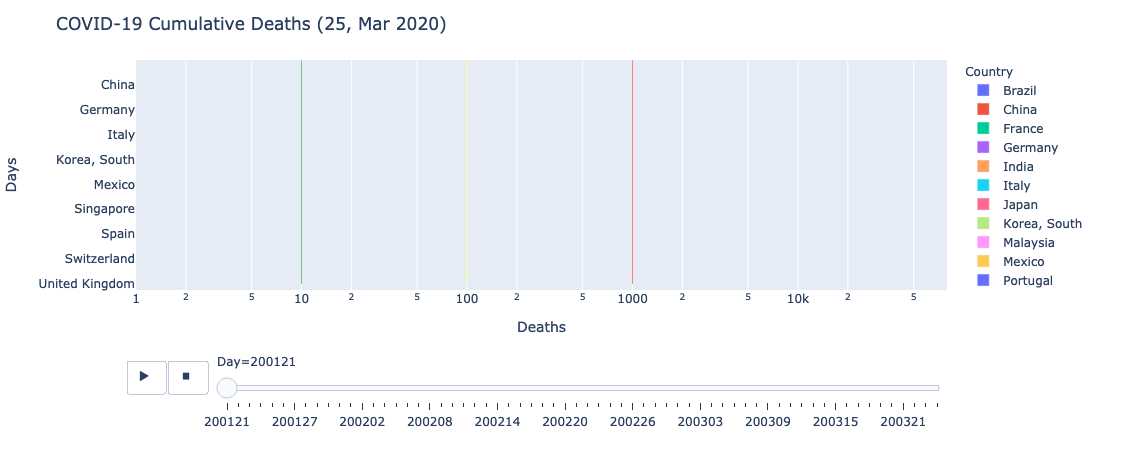

'html/covid_19_total_deaths_animated_BR.html'

In [19]:
last_upt = dt.date.today() #- dt.timedelta(days=1)

title = 'COVID-19 Cumulative Deaths (' + "{:%d, %b %Y}".format(last_upt) +')'
autor = 'Author: Prof. Carlos Ed Beluzo - cbeluzo@gmail.com'
data_source= 'Data source: data.humdata.org, data.worldbank.org'

country_list = ['Brazil', 'China', 'France',  'Germany',
        'India', 'Italy',  'Japan',
        'Korea, South',  'Malaysia', 'Mexico',
        'Portugal', 'Singapore', 'South Africa', 'Spain',  'Sweden', 'Switzerland', 'Taiwan*',
        'United Kingdom']

#dfa = pd.DataFrame()
#dfA = df1.loc[df1['country'].isin(country_list)]

graf = px.bar(dfA.sort_values(['Day','cases'],ascending=True), y='country', x='cases', color='country', orientation='h',
              animation_frame="Day", animation_group="country", #text='country',
              #width=1200, 
              #height=800,
               hover_data=['Day', 'country', 'cases'], 
             labels={'country':'Country', 'cases':'Deaths'},
             )

#graf.update_traces(textposition='top center')
#                   marker_line_width=0.5, marker_line_color="black", mode='lines+markers')

graf.update_layout(
    template='plotly',
    xaxis_type="log",
    #yaxis_type="log",
    #transition = {'duration': 100},
    #title_text=title,
    xaxis = dict(range=(0, 4.9), constrain='domain'),
    #yaxis = dict(range=df1.country.unique())
)

annotations = []


graf.update_layout(annotations=annotations,
                  #uniformtext_minsize=8,
                  #uniformtext_mode='hide',
                  #xaxis_type="log",
                  title_text=title,
                  xaxis_title='Deaths',
                  yaxis_title='Days',
                  shapes=[{'type': 'line','x0': 10,'y0': 0,'x1': 10,'y1': dfA.country.unique().shape[0],
                           'line': {'color': 'green','width': 0.5}},
                         {'type': 'line','x0': 100,'y0': 0,'x1': 100,'y1': dfA.country.unique().shape[0],
                           'line': {'color': 'yellow','width': 0.5}},
                         {'type': 'line','x0': 1000,'y0': 0,'x1': 1000,'y1': dfA.country.unique().shape[0],
                           'line': {'color': 'red','width': 0.5}}]
                  )

graf.show()
plt.offline.plot(graf, filename="html/covid_19_total_deaths_animated_BR.html")
#df1.to_csv (r'data/covid_19_sns_population_infection_rate.csv', index = False, header=True)

#https://plot.ly/python/v3/line-and-scatter/#style-scatter-plots
#https://towardsdatascience.com/plotly-python-scatter-plots-2ea1b4885c90